In [9]:
#Script to use the Gill module to reproduce the seven figures in Bretherton & Sobel (2003).
#Independent cells for each figure? (even if there is some repetition)

In [10]:
import gill

In [11]:
#import Python library dependencies
import numpy as np
import matplotlib.pyplot as plt


In [21]:
#re-import gill for any new changes
import importlib
importlib.reload(gill)

<module 'gill' from '/home/russotto/projects/GillForPublic/gill.py'>

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


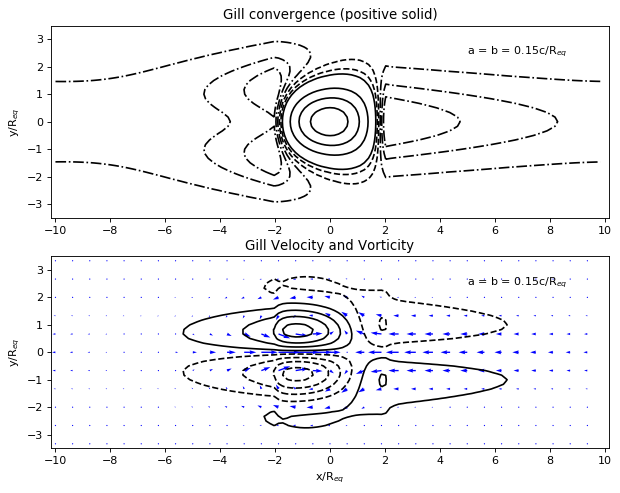

In [13]:
#Figure 1: Classical Gill model with a default mass sink
#(Default parameters except negative sign for sink instead of source)
#Note: the top panel is correctly labeled as convergence in the original paper
#      but incorrectly described as divergence in the figure caption.
setupDict1 = gill.setupGillM_Gaussian(D0=-1.)
resultsDict1 = gill.GillComputations(setupDict1)

gill.plotGillDivVortVel(resultsDict1)

plt.savefig('plots/BS03_Figure_1.png')
plt.savefig('plots/BS03_Figure_1.pdf')

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


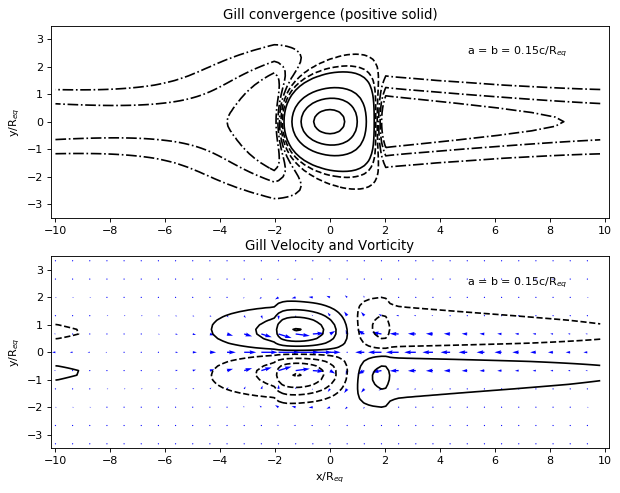

In [14]:
#Figure 2: As in Figure 1 but with zonal compensation of the mass sink (i.e. subtract zonal mean)
setupDict2 = gill.setupGillM_Gaussian(D0=-1., zonalcomp=True)
resultsDict2 = gill.GillComputations(setupDict2)

gill.plotGillDivVortVel(resultsDict2)

plt.savefig('plots/BS03_Figure_2.png')
plt.savefig('plots/BS03_Figure_2.pdf')

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


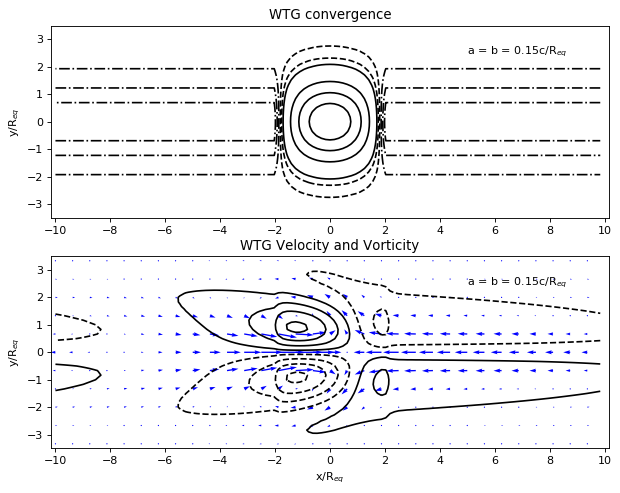

In [15]:
#Figure 3: As in Figure 2 except with WTG approximation
#Note: do not get same result from not using "zonalcomp" first (i.e. inputting setupDict 1 instead of 2)
#      even though comments in the Matlab code suggest this should be the case.

#Why different figure sizes when new figure defined inside function rather than outside?

resultsDict3 = gill.WTG_Computations(setupDict2)

plt.figure(3, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
gill.plotDivergenceNoFigure(resultsDict3, subtitle='WTG convergence')
plt.xlabel('') #overlaps with bottom title, and unnecessary
plt.subplot(2,1,2)
gill.plotVortVelNoFigure(resultsDict3, subtitle='WTG Velocity and Vorticity')

plt.savefig('plots/BS03_Figure_3.png')
plt.savefig('plots/BS03_Figure_3.pdf')

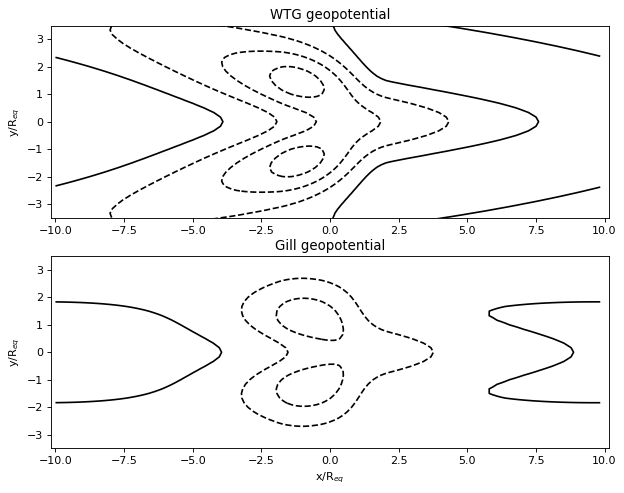

In [16]:
#Figure 4: Geopotential change corresponding to Figures 3 (top) and 2 (bottom)
plt.figure(4, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
gill.plotGeopotentialNoFigure(resultsDict3, subtitle='WTG geopotential')
plt.xlabel('')
plt.subplot(2,1,2)
gill.plotGeopotentialNoFigure(resultsDict2, subtitle='Gill geopotential')

plt.savefig('plots/BS03_Figure_4.png')
plt.savefig('plots/BS03_Figure_4.pdf')

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


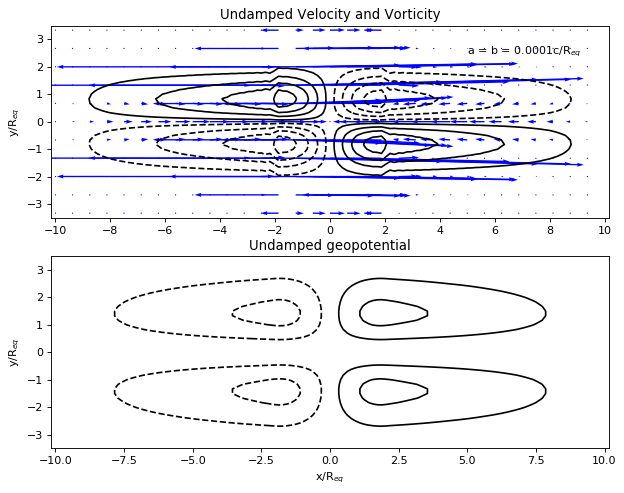

In [24]:
#Figure 5: As in Figure 2 but undamped (no friction/dissipation)
resultsDict5 = gill.GillComputations(setupDict2, nodiss=True)

plt.figure(5, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
gill.plotVortVelNoFigure(resultsDict5, subtitle='Undamped Velocity and Vorticity')
plt.xlabel('')
plt.subplot(2,1,2)
gill.plotGeopotentialNoFigure(resultsDict5, subtitle='Undamped geopotential')

plt.savefig('plots/BS03_Figure_5.png')
plt.savefig('plots/BS03_Figure_5.pdf')


#OK: vorticity and geopotential look right compared to paper, but 
#velocity way off in horizontal scale. 

#Maybe there is a problem with setting wavenumber 0 components to zero? 
#Could this be the problem with the zonal compensation figure as well?
#Flipping order didn't help...
#Wait--was looking in wrong function 
#Still didn't help
#Contours don't look right in the Matlab version either,
#but "exact" version looks right...

#Come back to this later

/home/russotto/miniconda3/envs/pangeo/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


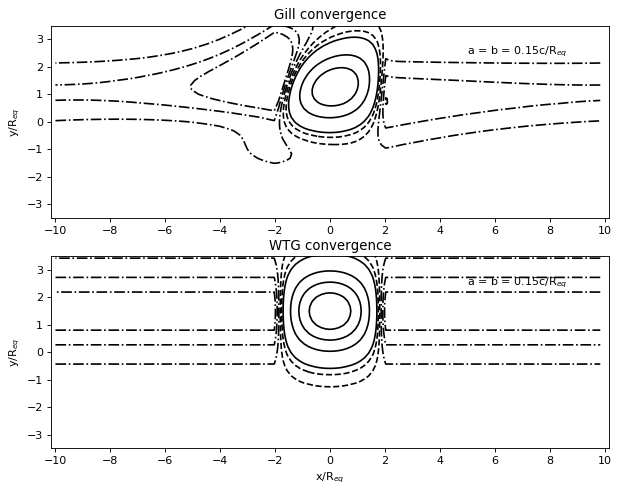

In [27]:
#Figure 6: off-equatorial, zonally compensated heat source (y0 = 1.5). 
#Plot convergence for both Gill and WTG versions
setupDict6 = gill.setupGillM_Gaussian(D0=-1, zonalcomp=True, y0=1.5)
resultsDict6_Gill = gill.GillComputations(setupDict6)
resultsDict6_WTG = gill.WTG_Computations(setupDict6)


plt.figure(6, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
gill.plotDivergenceNoFigure(resultsDict6_Gill, subtitle='Gill convergence')
plt.xlabel('')
plt.subplot(2,1,2)
gill.plotDivergenceNoFigure(resultsDict6_WTG, subtitle='WTG convergence')

plt.savefig('plots/BS03_Figure_6.png')
plt.savefig('plots/BS03_Figure_6.pdf')

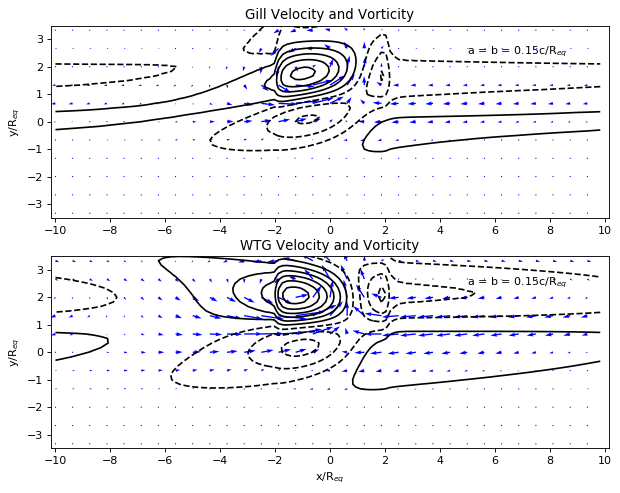

In [31]:
#Figure 7: as in Figure 6 but plotting velocity and vorticity

plt.figure(7, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
gill.plotVortVelNoFigure(resultsDict6_Gill, subtitle='Gill Velocity and Vorticity')
plt.xlabel('')
plt.subplot(2,1,2)
gill.plotVortVelNoFigure(resultsDict6_WTG, subtitle='WTG Velocity and Vorticity')

plt.savefig('plots/BS03_Figure_7.png')
plt.savefig('plots/BS03_Figure_7.pdf')

#Looks mostly good but something off with u again in top panel...
#Don't have Matlab version of these figures...
#Now I see even in first panel, small differences in "u" results direction where arrows very small. 

#Would it help to blow up the figure? 